### 최근 3개월 간 신용/체크카드 사용금액이 높을수록 Segment 등급이 높을 것이다.

In [2]:
import pandas as pd

# 1. 회원정보 불러오기 (Segment도 함께 불러온다고 가정)
df_member = pd.read_parquet("open/train/1.회원정보/201807_train_회원정보.parquet", columns=[
    'ID', 'Segment', '이용금액_R3M_신용체크', '이용금액_R3M_신용'
])

# Segment를 숫자로 변환 (필요 시)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_member['Segment_code'] = le.fit_transform(df_member['Segment'])

# 결과 확인
print(df_member.head())

             ID Segment  이용금액_R3M_신용체크  이용금액_R3M_신용  Segment_code
0  TRAIN_000000       D            196          196             3
1  TRAIN_000001       E          13475        13475             4
2  TRAIN_000002       C          23988        23988             2
3  TRAIN_000003       D           3904         3904             3
4  TRAIN_000004       E           1190            0             4


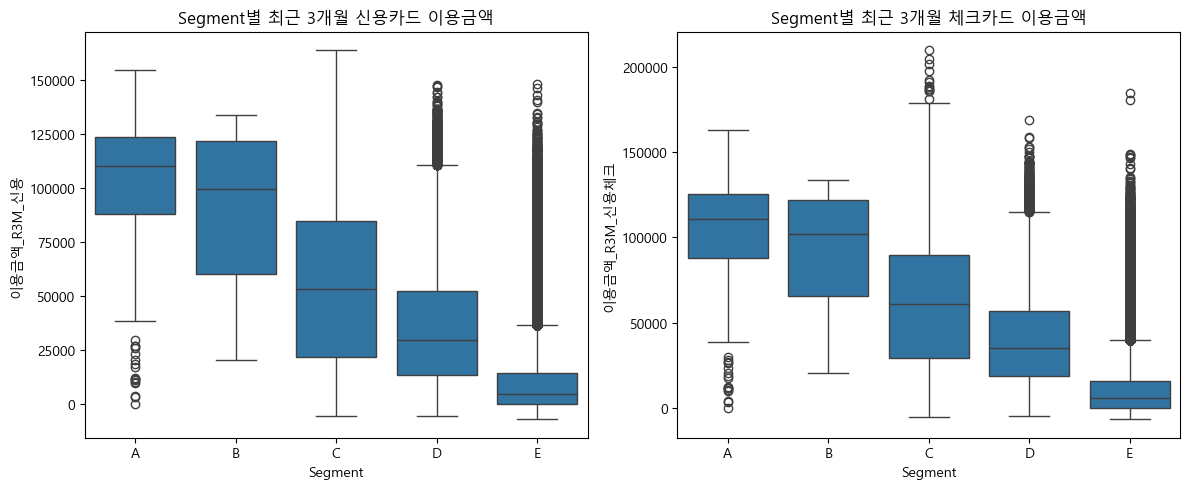

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 깨짐 방지
plt.rc('font', family='Malgun Gothic')  # Windows
plt.rc('axes', unicode_minus=False)

# 데이터 불러오기
df_member = pd.read_parquet("open/train/1.회원정보/201807_train_회원정보.parquet", columns=[
    'ID', 'Segment', '이용금액_R3M_신용체크', '이용금액_R3M_신용'
])

# Segment 순서 지정 (A~E)
segment_order = ['A', 'B', 'C', 'D', 'E']
df_member['Segment'] = pd.Categorical(df_member['Segment'], categories=segment_order, ordered=True)

# 박스플롯
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Segment', y='이용금액_R3M_신용', data=df_member)
plt.title('Segment별 최근 3개월 신용카드 이용금액')

plt.subplot(1, 2, 2)
sns.boxplot(x='Segment', y='이용금액_R3M_신용체크', data=df_member)
plt.title('Segment별 최근 3개월 체크카드 이용금액')

plt.tight_layout()
plt.show()


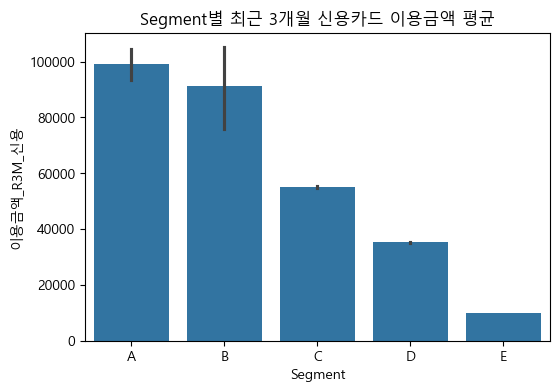

In [8]:
# 평균 막대그래프 (Segment별 평균 비교)
plt.figure(figsize=(6, 4))
sns.barplot(x='Segment', y='이용금액_R3M_신용', data=df_member, order=segment_order)
plt.title('Segment별 최근 3개월 신용카드 이용금액 평균')
plt.show()

소비 금액 데이터는 이상치의 영향을 많이 받기 때문에,
중앙값이 더 적절하다고 판단해 박스플롯을 활용.
다만 평균을 참고하는 것도 의미 있어서 막대그래프도 함께 비교했음

### 1순위 카드의 사용량이 크다면, 핵심 고객일 가능성이 높고 Segment등급이 높을 것이다.

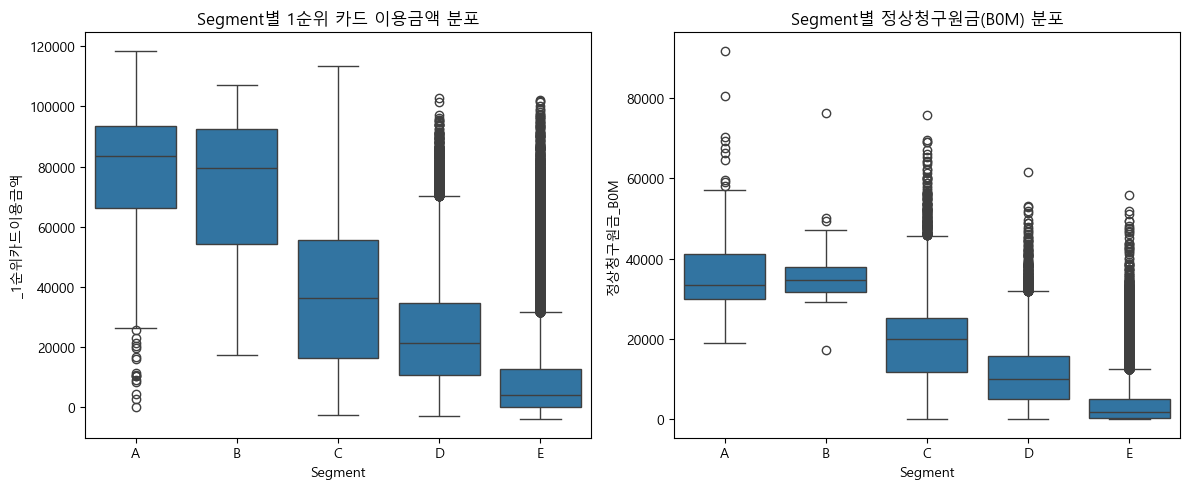

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows 기준)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# Segment 순서 정의
segment_order = ['A', 'B', 'C', 'D', 'E']

# 1. 회원정보 불러오기
df_member = pd.read_parquet("open/train/1.회원정보/201807_train_회원정보.parquet", columns=[
    'ID', 'Segment', '_1순위카드이용금액'
])
df_member['Segment'] = pd.Categorical(df_member['Segment'], categories=segment_order, ordered=True)

# 2. 승인매출정보 불러오기
df_sales = pd.read_parquet("open/train/3.승인매출정보/201807_train_승인매출정보.parquet", columns=[
    'ID', '정상청구원금_B0M'
])

# 3. 병합
df = pd.merge(df_member, df_sales, on='ID', how='inner')

# 4. 시각화 - Boxplot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Segment', y='_1순위카드이용금액', data=df, order=segment_order)
plt.title('Segment별 1순위 카드 이용금액 분포')

plt.subplot(1, 2, 2)
sns.boxplot(x='Segment', y='정상청구원금_B0M', data=df, order=segment_order)
plt.title('Segment별 정상청구원금(B0M) 분포')

plt.tight_layout()
plt.show()

1순위 카드 이용금액은 고객이 실제로 자주 사용하는 카드 정보를 나타낸다.

Segment 등급이 높을수록 금액이 높은 경향이 관찰된다면, 해당 고객이 회사에 중요한 고객임을 시사한다.

정상청구원금 역시 고객의 정상 소비 패턴을 보여주는 중요한 지표로 활용했다

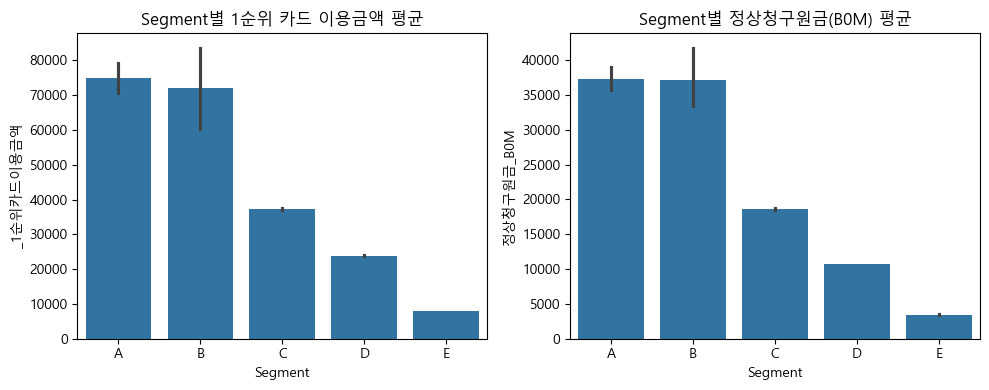

In [17]:

# Segment 순서 정의
segment_order = ['A', 'B', 'C', 'D', 'E']

# 데이터 불러오기 (이미 df에 병합 완료된 상태라 가정)
# 만약 새로 불러야 한다면, 위에서 드린 코드 참고하세요.

# 1. 1순위 카드 이용금액 평균 막대그래프
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.barplot(x='Segment', y='_1순위카드이용금액', data=df, order=segment_order)
plt.title('Segment별 1순위 카드 이용금액 평균')

# 2. 정상청구원금 평균 막대그래프
plt.subplot(1, 2, 2)
sns.barplot(x='Segment', y='정상청구원금_B0M', data=df, order=segment_order)
plt.title('Segment별 정상청구원금(B0M) 평균')

plt.tight_layout()
plt.show()


평균 막대그래프를 통해 각 Segment별 1순위 카드 이용금액과 정상청구원금의 평균 수준을 직관적으로 비교할 수 있다.

평균은 일부 고액 사용자의 영향으로 왜곡될 수 있으나, 전반적인 경향성을 파악하는 데 유용하다

박스플롯과 병행하면 분포의 전반적인 모습과 중심 경향성 두 가지 모두 이해할 수 있다.

### 최근 1~2개월간 정상 입금된 원금이 많을수록,고객의 연체 위험이 낮고 신용도가 높아 Segment 등급이 높을 것이다.

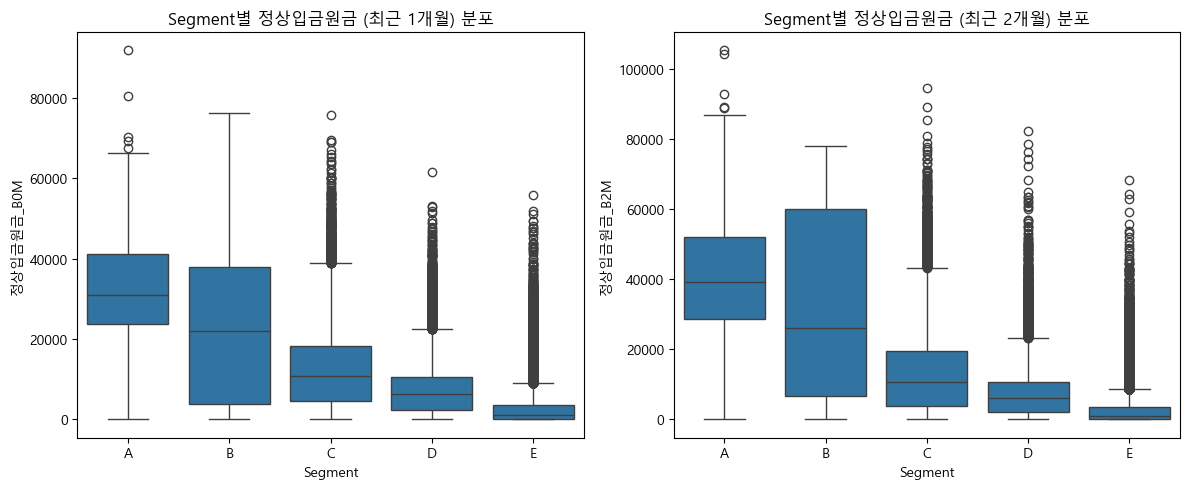

In [22]:
# Segment 순서 정의
segment_order = ['A', 'B', 'C', 'D', 'E']

# 1. 회원정보 불러오기
df_member = pd.read_parquet("open/train/1.회원정보/201807_train_회원정보.parquet", columns=[
    'ID', 'Segment'
])
df_member['Segment'] = pd.Categorical(df_member['Segment'], categories=segment_order, ordered=True)

# 2. 승인매출정보 불러오기
df_pay = pd.read_parquet("open/train/3.승인매출정보/201807_train_승인매출정보.parquet", columns=[
    'ID', '정상입금원금_B0M', '정상입금원금_B2M'
])

# 3. 병합
df = pd.merge(df_member, df_pay, on='ID', how='inner')

# 4. 시각화 - Boxplot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Segment', y='정상입금원금_B0M', data=df, order=segment_order)
plt.title('Segment별 정상입금원금 (최근 1개월) 분포')

plt.subplot(1, 2, 2)
sns.boxplot(x='Segment', y='정상입금원금_B2M', data=df, order=segment_order)
plt.title('Segment별 정상입금원금 (최근 2개월) 분포')

plt.tight_layout()
plt.show()

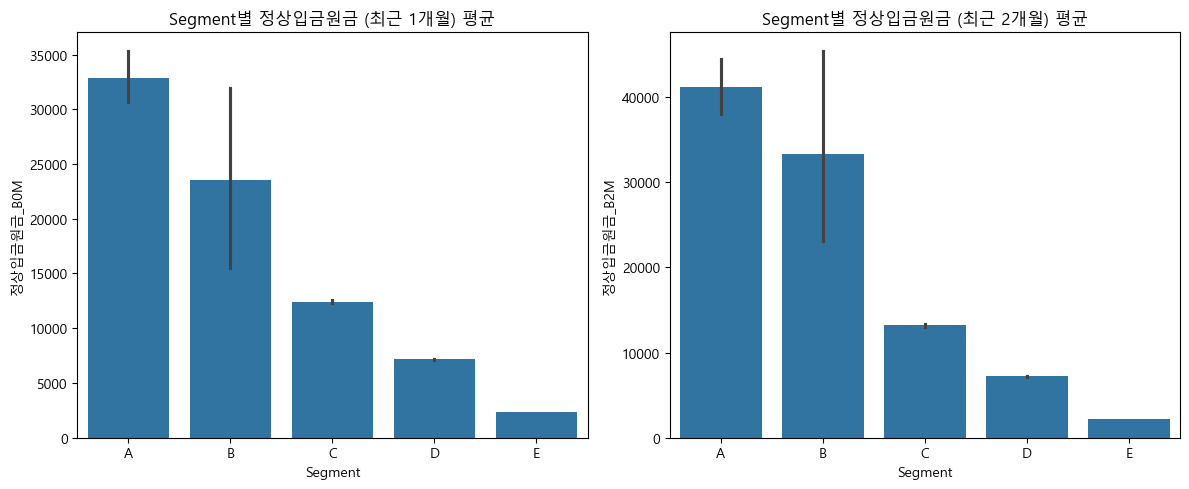

In [24]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Segment', y='정상입금원금_B0M', data=df, order=segment_order)
plt.title('Segment별 정상입금원금 (최근 1개월) 평균')

plt.subplot(1, 2, 2)
sns.barplot(x='Segment', y='정상입금원금_B2M', data=df, order=segment_order)
plt.title('Segment별 정상입금원금 (최근 2개월) 평균')

plt.tight_layout()
plt.show()

"최근 1~2개월간 정상 입금된 원금이 많은 고객은 연체 위험이 낮아 신용도가 높은 것으로 간주됩니다."

"Segment A~E별 분포와 평균을 비교했을 때, 상위 Segment일수록 정상 입금원금이 더 높은 경향이 명확히 나타납니다."

### 지난 12개월 중 일시불 최대 사용금액이 높을수록,고액 소비 경험이 있는 고객으로 신용도 및 소비 여력이 높아 Segment 등급이 높을 것이다.

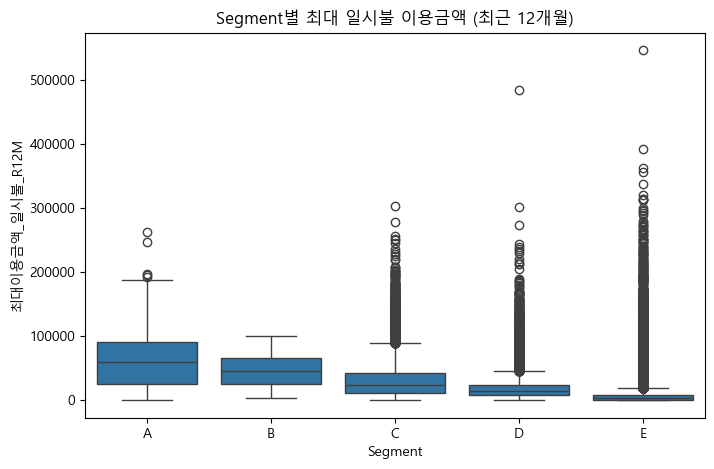

In [28]:
# Segment 순서 정의
segment_order = ['A', 'B', 'C', 'D', 'E']

# 1. 회원정보 불러오기
df_member = pd.read_parquet("open/train/1.회원정보/201807_train_회원정보.parquet", columns=[
    'ID', 'Segment'
])
df_member['Segment'] = pd.Categorical(df_member['Segment'], categories=segment_order, ordered=True)

# 2. 승인매출정보 불러오기
df_sales = pd.read_parquet("open/train/3.승인매출정보/201807_train_승인매출정보.parquet", columns=[
    'ID', '최대이용금액_일시불_R12M'
])

# 3. 병합
df = pd.merge(df_member, df_sales, on='ID', how='inner')

# 4. 시각화 - Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Segment', y='최대이용금액_일시불_R12M', data=df, order=segment_order)
plt.title('Segment별 최대 일시불 이용금액 (최근 12개월)')
plt.show()

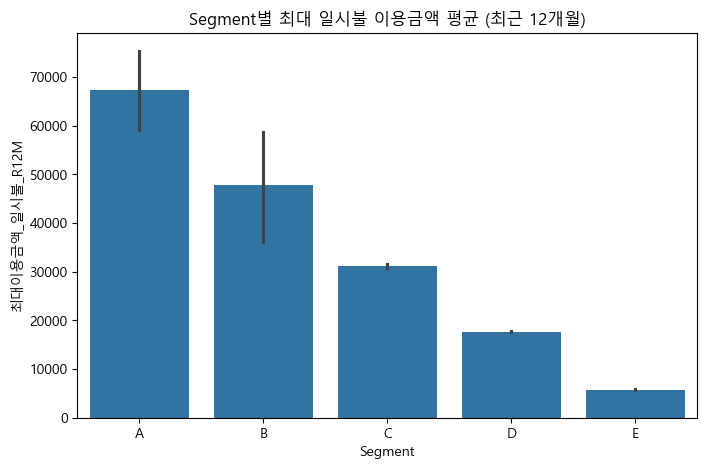

In [30]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Segment', y='최대이용금액_일시불_R12M', data=df, order=segment_order)
plt.title('Segment별 최대 일시불 이용금액 평균 (최근 12개월)')
plt.show()

고액 일시불 결제 경험이 많은 고객은 신용도가 높고 금융사에 중요한 고객으로 분류된다.

Segment A~E별로 최대 이용금액 분포를 보면, 상위 Segment일수록 최대 일시불 이용금액이 확실히 크다.

### 6개월간 청구금액 및 평균 잔액이 크고, 할부 잔액이 적절히 유지되는 고객은 소득과 소비의 균형이 잡힌 안정적인 소비패턴을 가진 고객으로, Segment 등급이 높을 것이다.

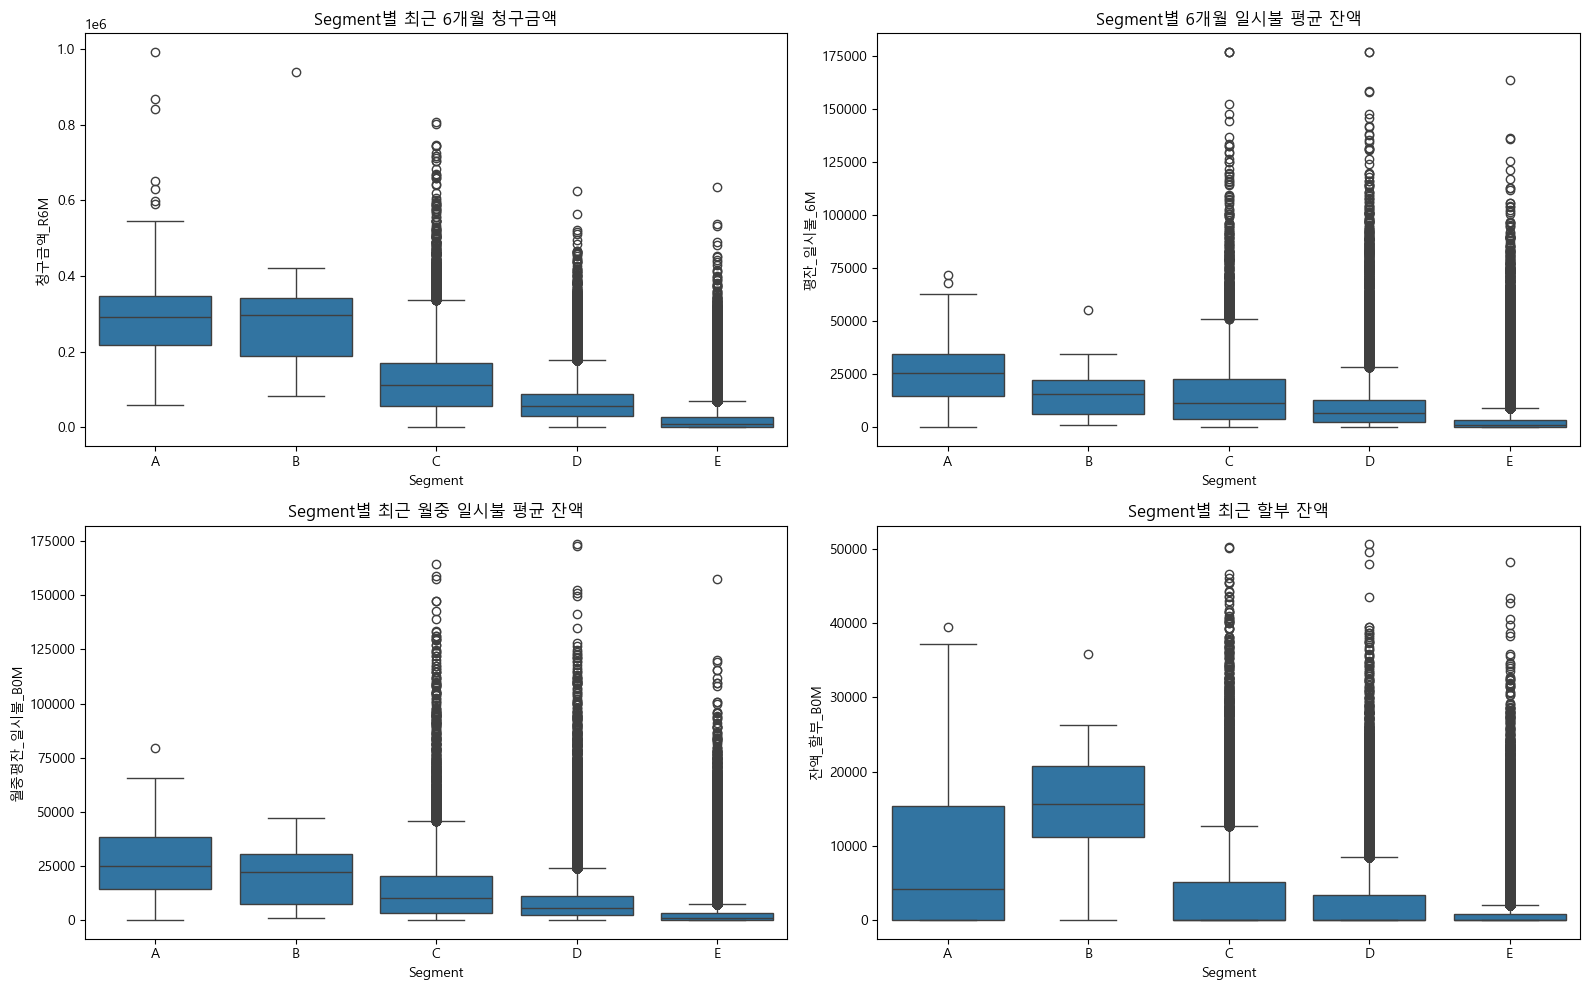

In [34]:
# Segment 순서 정의
segment_order = ['A', 'B', 'C', 'D', 'E']

# 1. 회원정보 불러오기
df_member = pd.read_parquet("open/train/1.회원정보/201807_train_회원정보.parquet", columns=[
    'ID', 'Segment'
])
df_member['Segment'] = pd.Categorical(df_member['Segment'], categories=segment_order, ordered=True)

# 2. 청구입금정보 불러오기
df_billing = pd.read_parquet("open/train/4.청구입금정보/201812_train_청구정보.parquet", columns=[
    'ID', '청구금액_R6M'
])

# 3. 잔액정보 불러오기
df_balance = pd.read_parquet("open/train/5.잔액정보/201812_train_잔액정보.parquet", columns=[
    'ID', '평잔_일시불_6M', '월중평잔_일시불_B0M', '잔액_할부_B0M'
])

# 4. 병합
df_temp = pd.merge(df_member, df_billing, on='ID', how='inner')
df = pd.merge(df_temp, df_balance, on='ID', how='inner')

# 5. 시각화 - Boxplot 여러 변수 한번에 보기
plt.figure(figsize=(16, 10))

variables = ['청구금액_R6M', '평잔_일시불_6M', '월중평잔_일시불_B0M', '잔액_할부_B0M']
titles = ['Segment별 최근 6개월 청구금액',
          'Segment별 6개월 일시불 평균 잔액',
          'Segment별 최근 월중 일시불 평균 잔액',
          'Segment별 최근 할부 잔액']

for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Segment', y=var, data=df, order=segment_order)
    plt.title(titles[i])

plt.tight_layout()
plt.show()

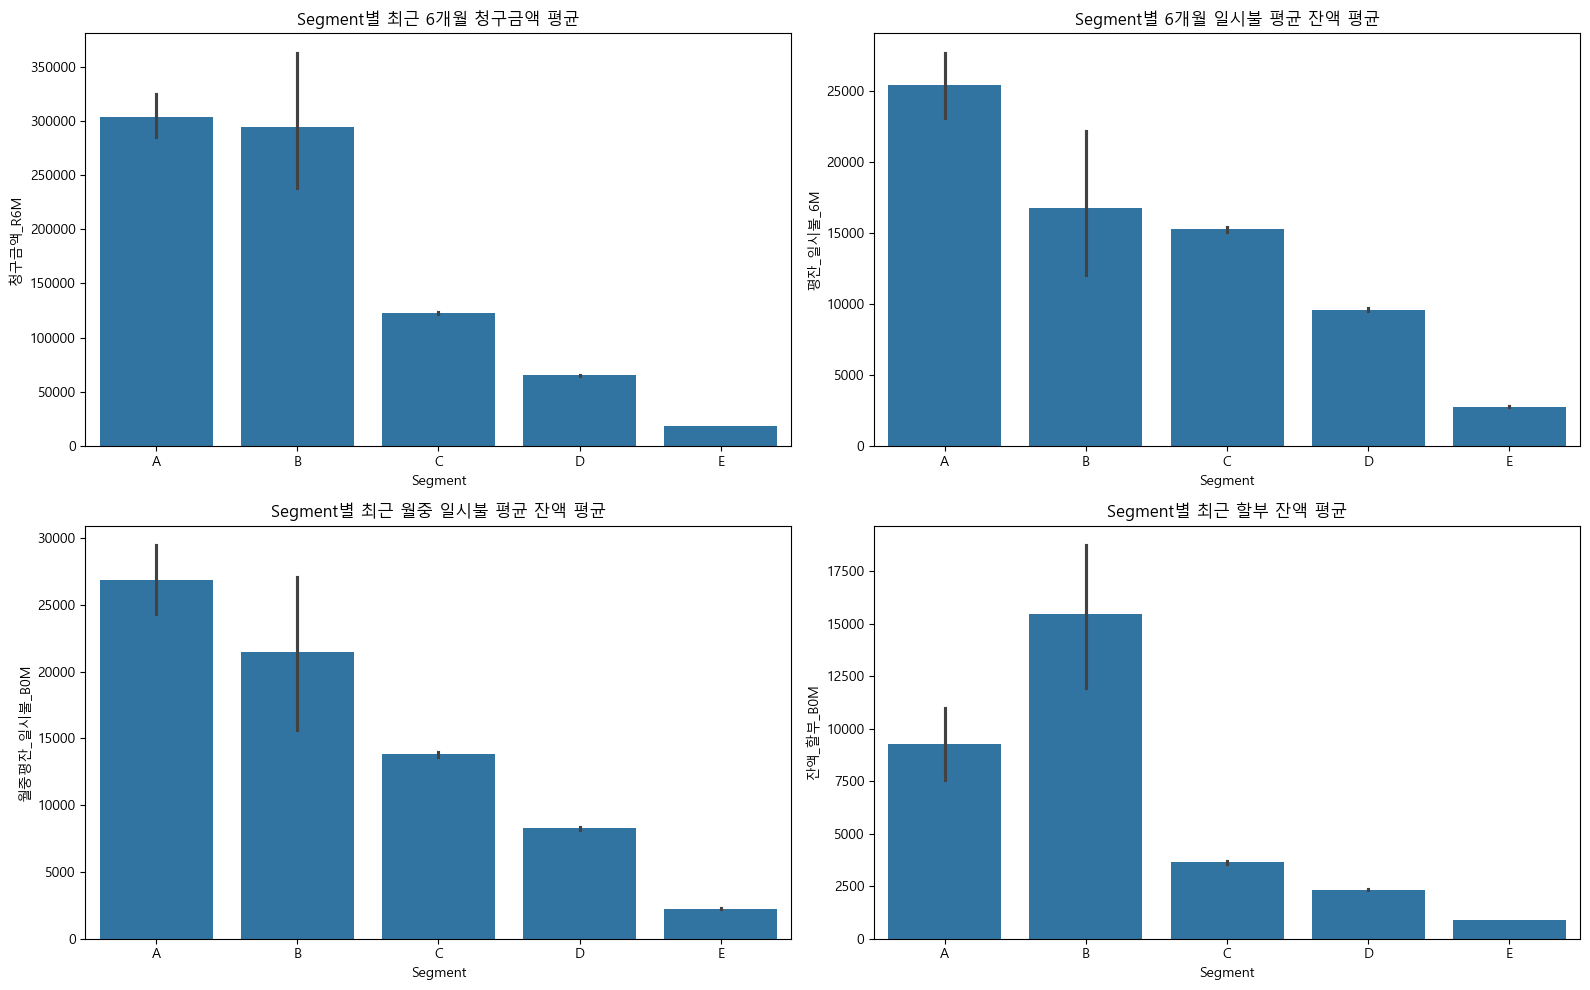

In [36]:
# Segment 순서 정의
segment_order = ['A', 'B', 'C', 'D', 'E']

# 시각화 - 평균 막대그래프
plt.figure(figsize=(16, 10))

variables = ['청구금액_R6M', '평잔_일시불_6M', '월중평잔_일시불_B0M', '잔액_할부_B0M']
titles = ['Segment별 최근 6개월 청구금액 평균',
          'Segment별 6개월 일시불 평균 잔액 평균',
          'Segment별 최근 월중 일시불 평균 잔액 평균',
          'Segment별 최근 할부 잔액 평균']

for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Segment', y=var, data=df, order=segment_order)
    plt.title(titles[i])

plt.tight_layout()
plt.show()

청구금액과 잔액 정보는 고객의 소비 패턴과 신용 상태를 종합적으로 보여준다

높은 Segment 등급일수록 안정적인 소비와 상환이 유지되는 경향이 박스플롯을 통해 확인된다.

이 변수들은 서로 보완적으로 작용해 신용평가 모델에서 중요한 역할을 한다고 판단.

## 다만 Segment별 최근 할부 잔액 평균 부분에서 B가 A보다 높게 나온 것에 대하여 추정
- Segment B 고객은 A보다 신용등급이 한 단계 낮지만,
전반적인 소비력은 여전히 높고 할부잔액도 많다.
이는 재정 여유는 있지만, 현금 흐름 유지를 위해 할부를 전략적으로 활용하는 특성일 수 있다.
특히 무이자 할부 혜택 등으로 인해 A보다 더 자주 할부를 이용하되,
상환 능력은 충분하기 때문에 신용 위험은 낮지만, 모델 평가상 A보다는 다소 낮은 등급으로 분류된 것으로 보인다.